# Fashion-MNIST classification

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.devalidation_data=(val_x, val_y),
    epochs=50, batch_size=250,
    verbose=2)composition import PCA
from sklearn.manifold import TSNE
from tensorflow import keras

In [2]:
(train_x, train_y), (test_x, test_y) = keras.datasets.fashion_mnist.load_data()

In [3]:
labels = [
    'top', 'trousers', 'pullover', 'dress', 'coat',
    'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

In [4]:
val_x, val_y = test_x[:5000], test_y[:5000]
test_x, test_y = test_x[5000:], test_y[5000:]

In [5]:
print(f'Images shape: {train_x.shape} : {val_x.shape} : {test_x.shape}')
print(f'Labels shape: {train_y.shape} : {val_y.shape} : {test_y.shape}')

Images shape: (60000, 28, 28) : (5000, 28, 28) : (5000, 28, 28)
Labels shape: (60000,) : (5000,) : (5000,)


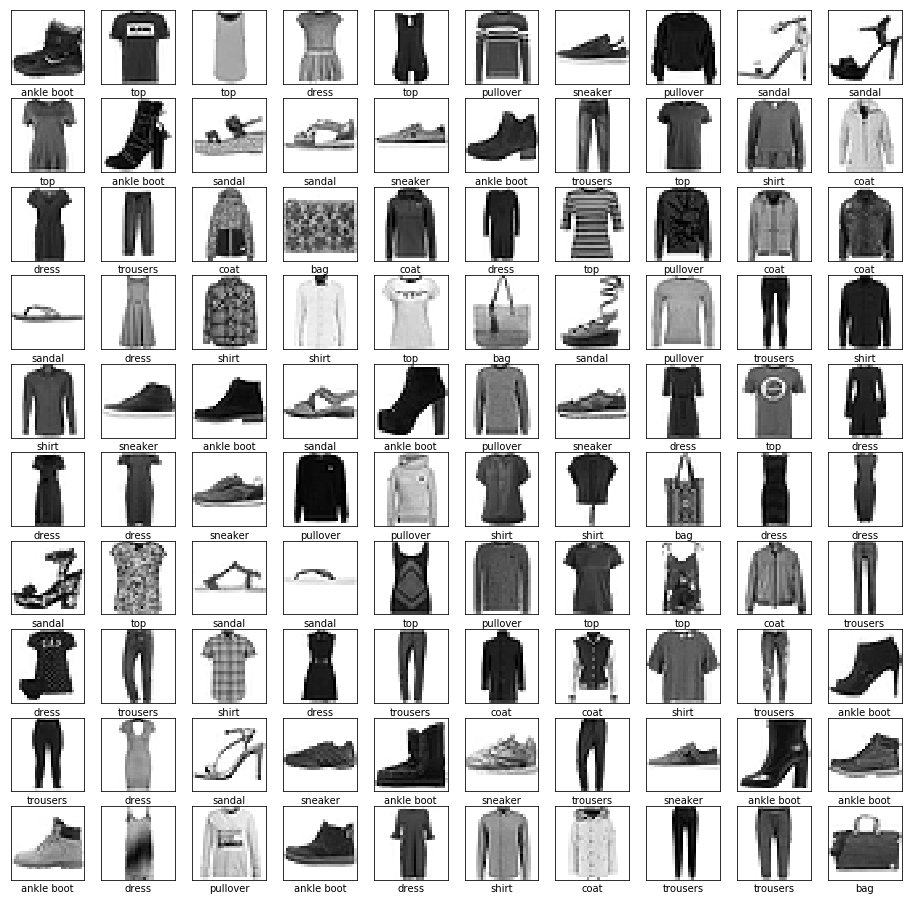

In [6]:
images_n = 10
plt.figure(figsize=(16, 16))
for i in range(images_n ** 2):
    plt.subplot(images_n, images_n, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_x[i], cmap=plt.cm.binary)
    plt.xlabel(labels[train_y[i]])

In [7]:
train_x = train_x / 255
val_x = val_x / 255
test_x = test_x / 255

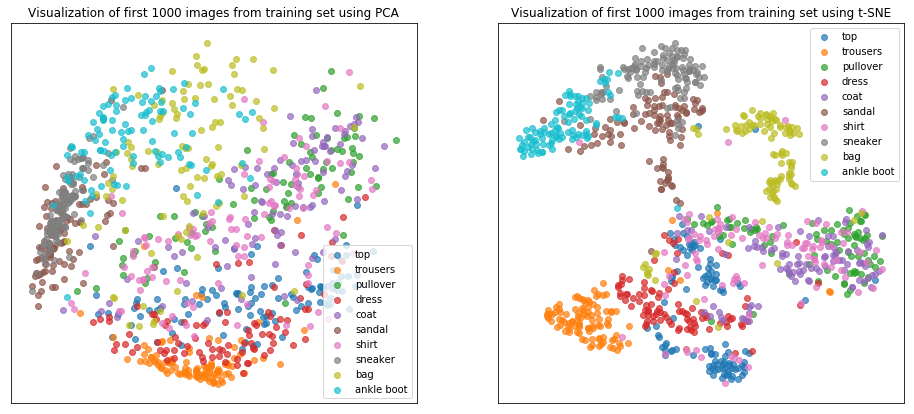

In [8]:
points_n = 1000
plt.figure(figsize=(16, 7))
for i, (alg_name, alg) in enumerate([('PCA', PCA(n_components=2)), ('t-SNE', TSNE(n_components=2))]):
    x = alg.fit_transform(train_x[:points_n].reshape(-1, 784))
    y = train_y[:points_n]
    data = {labels[i]: x[y == i] for i in np.unique(y)}
    
    plt.subplot(1, 2, i + 1)
    for label, points in data.items():
        plt.scatter(points[:, 0], points[:, 1], alpha=0.7, label=label)
    plt.xticks([])
    plt.yticks([])
    plt.legend()
    plt.title(f'Visualization of first {points_n} images from training set using {alg_name}')
plt.show()

In [9]:
def plot_history(history):
    plt.figure(figsize=(16, 5))
    for i, (name, key) in enumerate([('accuracy', 'acc'), ('loss', 'loss')]):
        plt.subplot(1, 2, i + 1)
        plt.xlabel('epoch')
        plt.ylabel(name)
        plt.plot(history.epoch, history.history[key], label=f'training {name}')
        plt.plot(history.epoch, history.history[f'val_{key}'], label=f'validation {name}')
        plt.legend()
        plt.title(f'Visualization of {name} during training')
    plt.show()

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(10, activation='softmax')])
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dropout (Dropout)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = model.fit(
    train_x,
    train_y,
    validation_data=(val_x, val_y),
    epochs=50, batch_size=250,
    verbose=2)

Train on 60000 samples, validate on 5000 samples
Epoch 1/50
 - 2s - loss: 0.7432 - acc: 0.7389 - val_loss: 0.4897 - val_acc: 0.8320
Epoch 2/50
 - 3s - loss: 0.5097 - acc: 0.8178 - val_loss: 0.4398 - val_acc: 0.8478
Epoch 3/50
 - 2s - loss: 0.4628 - acc: 0.8338 - val_loss: 0.4095 - val_acc: 0.8568
Epoch 4/50
 - 2s - loss: 0.4387 - acc: 0.8427 - val_loss: 0.3971 - val_acc: 0.8636
Epoch 5/50
 - 2s - loss: 0.4188 - acc: 0.8476 - val_loss: 0.3828 - val_acc: 0.8662
Epoch 6/50
 - 3s - loss: 0.4049 - acc: 0.8542 - val_loss: 0.3770 - val_acc: 0.8668
Epoch 7/50
 - 3s - loss: 0.3951 - acc: 0.8553 - val_loss: 0.3714 - val_acc: 0.8684
Epoch 8/50
 - 2s - loss: 0.3819 - acc: 0.8602 - val_loss: 0.3640 - val_acc: 0.8674
Epoch 9/50
 - 2s - loss: 0.3777 - acc: 0.8623 - val_loss: 0.3600 - val_acc: 0.8702
Epoch 10/50
 - 2s - loss: 0.3702 - acc: 0.8640 - val_loss: 0.3591 - val_acc: 0.8702
Epoch 11/50
 - 2s - loss: 0.3631 - acc: 0.8668 - val_loss: 0.3526 - val_acc: 0.8740
Epoch 12/50
 - 2s - loss: 0.3610 - a

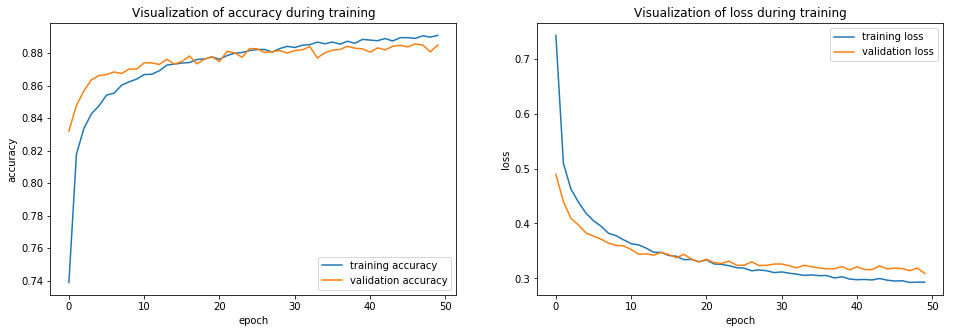

In [12]:
plot_history(history)

In [13]:
model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(64, kernel_size=(5, 5), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(128, kernel_size=(1, 1), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')])
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         8320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
__________

In [14]:
history = model.fit(
    train_x.reshape(-1, 28, 28, 1),
    train_y,
    validation_data=(val_x.reshape(-1, 28, 28, 1), val_y),
    epochs=50, batch_size=250,
    verbose=2)

Train on 60000 samples, validate on 5000 samples
Epoch 1/50
 - 29s - loss: 0.9213 - acc: 0.6572 - val_loss: 0.5640 - val_acc: 0.7818
Epoch 2/50
 - 29s - loss: 0.5664 - acc: 0.7920 - val_loss: 0.4540 - val_acc: 0.8314
Epoch 3/50
 - 29s - loss: 0.4859 - acc: 0.8271 - val_loss: 0.3956 - val_acc: 0.8588
Epoch 4/50
 - 29s - loss: 0.4322 - acc: 0.8445 - val_loss: 0.3757 - val_acc: 0.8720
Epoch 5/50
 - 29s - loss: 0.3966 - acc: 0.8571 - val_loss: 0.3567 - val_acc: 0.8752
Epoch 6/50
 - 29s - loss: 0.3759 - acc: 0.8648 - val_loss: 0.3332 - val_acc: 0.8810
Epoch 7/50
 - 28s - loss: 0.3569 - acc: 0.8715 - val_loss: 0.3189 - val_acc: 0.8866
Epoch 8/50
 - 29s - loss: 0.3408 - acc: 0.8762 - val_loss: 0.3161 - val_acc: 0.8848
Epoch 9/50
 - 28s - loss: 0.3309 - acc: 0.8815 - val_loss: 0.3102 - val_acc: 0.8862
Epoch 10/50
 - 30s - loss: 0.3228 - acc: 0.8833 - val_loss: 0.2992 - val_acc: 0.8948
Epoch 11/50
 - 29s - loss: 0.3126 - acc: 0.8867 - val_loss: 0.2969 - val_acc: 0.8926
Epoch 12/50
 - 30s - loss

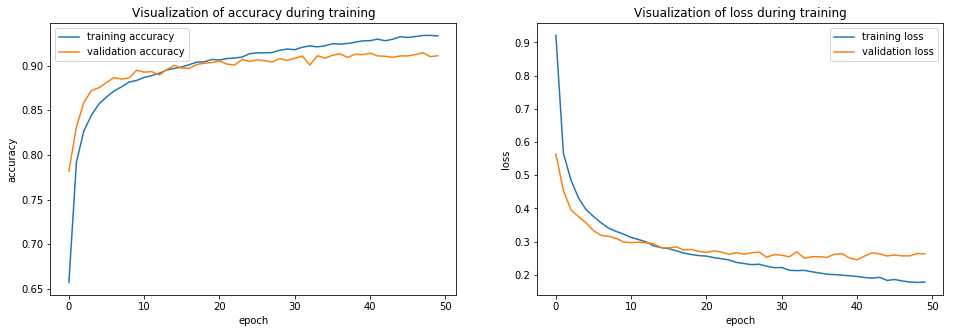

In [15]:
plot_history(history)